# Gender Recognition by Voice and Speech Analysis



Speech constitutes one of the most popular and significant means for humans to communicate, express their emotions, cognitive states, and intentions to each other. Speech is produced by humans using a natural biological mechanism in which lungs discharge the air and convert it to speech passing through the vocal cords and organs including the tongue, teeth, lips etc. 


In general, a speech and voice recognition system can be used for gender identification. A natural voice recognition system is the human ear. The human ear has an excellent mechanism which can efficiently distinguish the gender by voice and speech based on attributes like frequency and loudness. In a similar way, a machine can be taught to do the same thing by choosing and incorporating the right features from voice data on a machine learning algorithm.


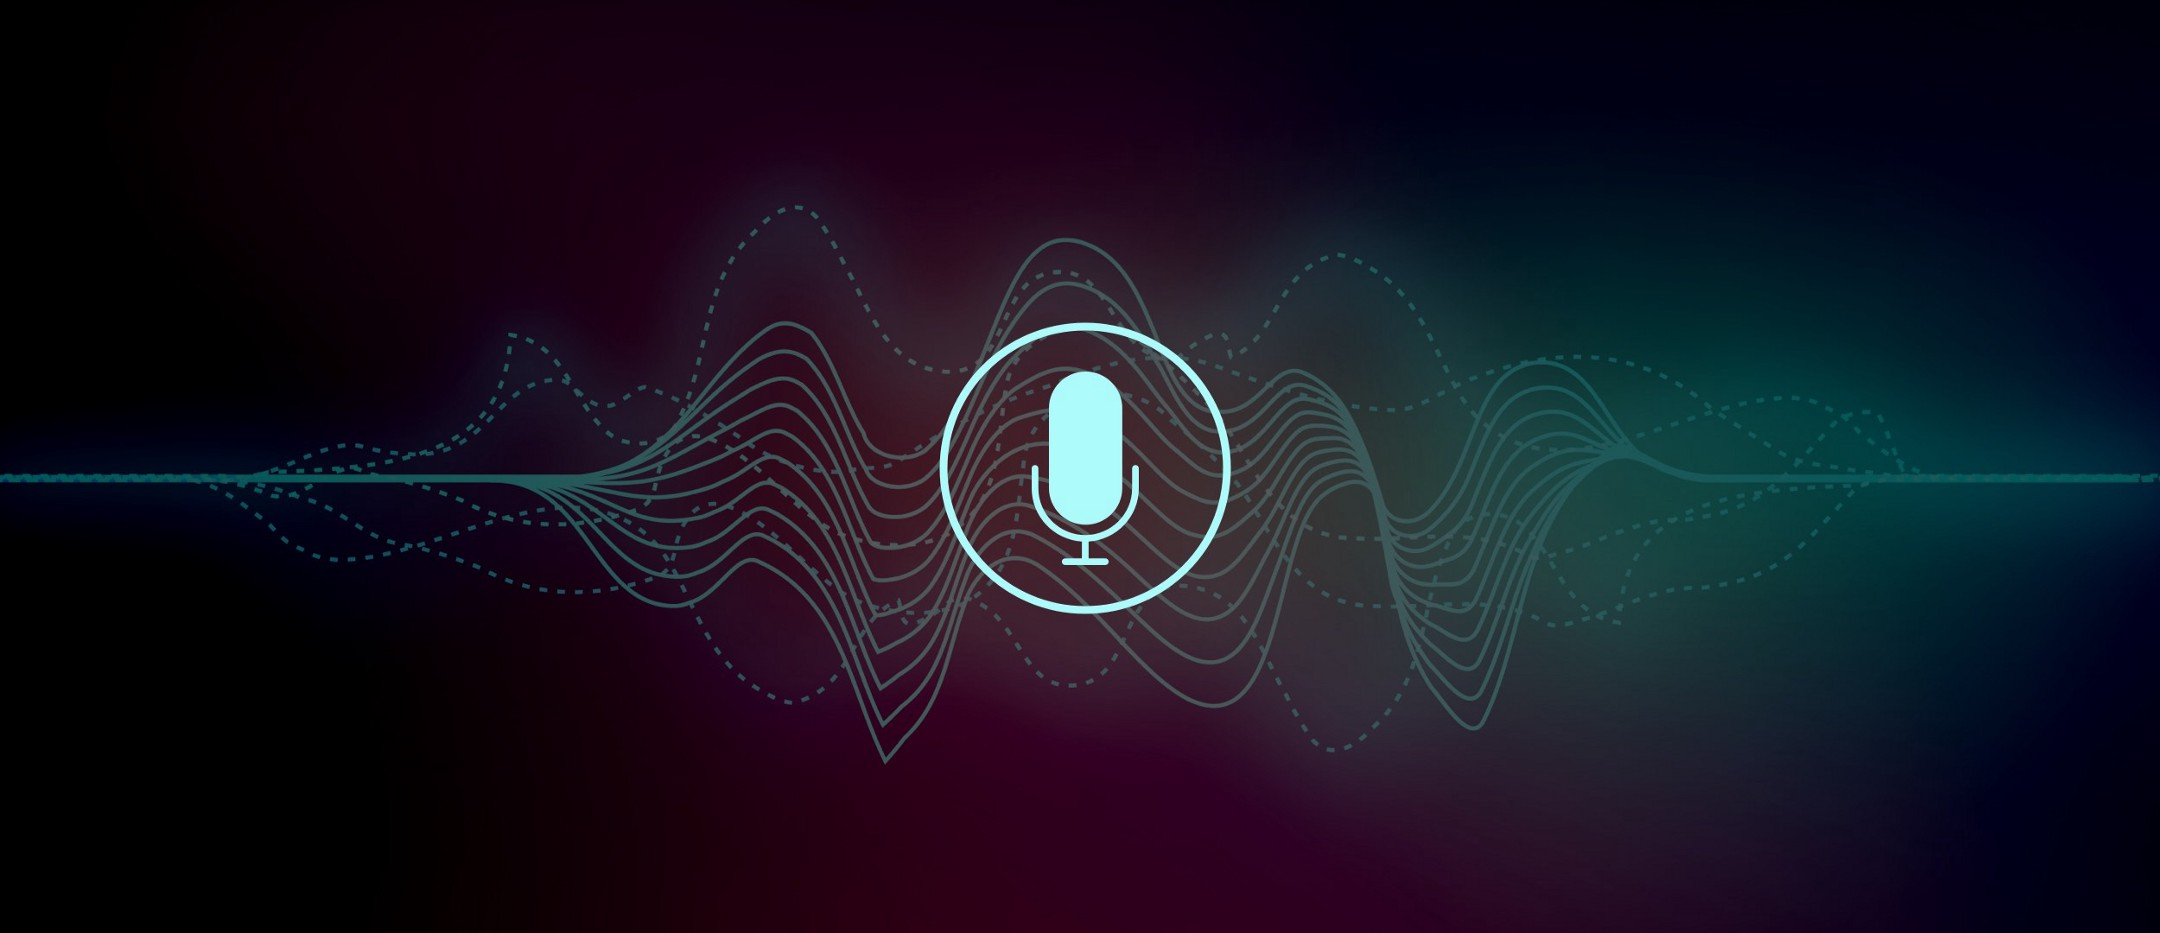

#### Dataset

The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.


A typical adult male will have a fundamental frequency from 85Hz to 180Hz and that of a typical adult female from 165 to 255Hz.



source: https://www.kaggle.com/primaryobjects/voicegender

Reference: https://www.mdpi.com/25044990/1/1/30/pdf#:~:text=In%20general%2C%20a%20speech%20and,attributes%20like%20frequency%20and%20loudness.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn.svm import SVC
import plotly.graph_objs as go


In [2]:
voice_df = pd.read_csv (r'D:\Durham_AI - Downloads\AI Algorithms\voice.csv')
display(voice_df)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
voice_df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### EDA:


Performing Exploratory Data Analysis and understanding data well.


Steps:

1. Inspecting the shape, details of columns of the dataset.


2. Checking for duplicate values.


3. Checking for null values, replacing them with values, if applicable.


4. Dropping irrelavant columns.


In [4]:
voice_df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [5]:
voice_df.shape

(3168, 21)

In [6]:
voice_df.drop_duplicates()
voice_df.shape

(3168, 21)

In [7]:
pd.set_option('display.max_columns', None)
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
print(voice_df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


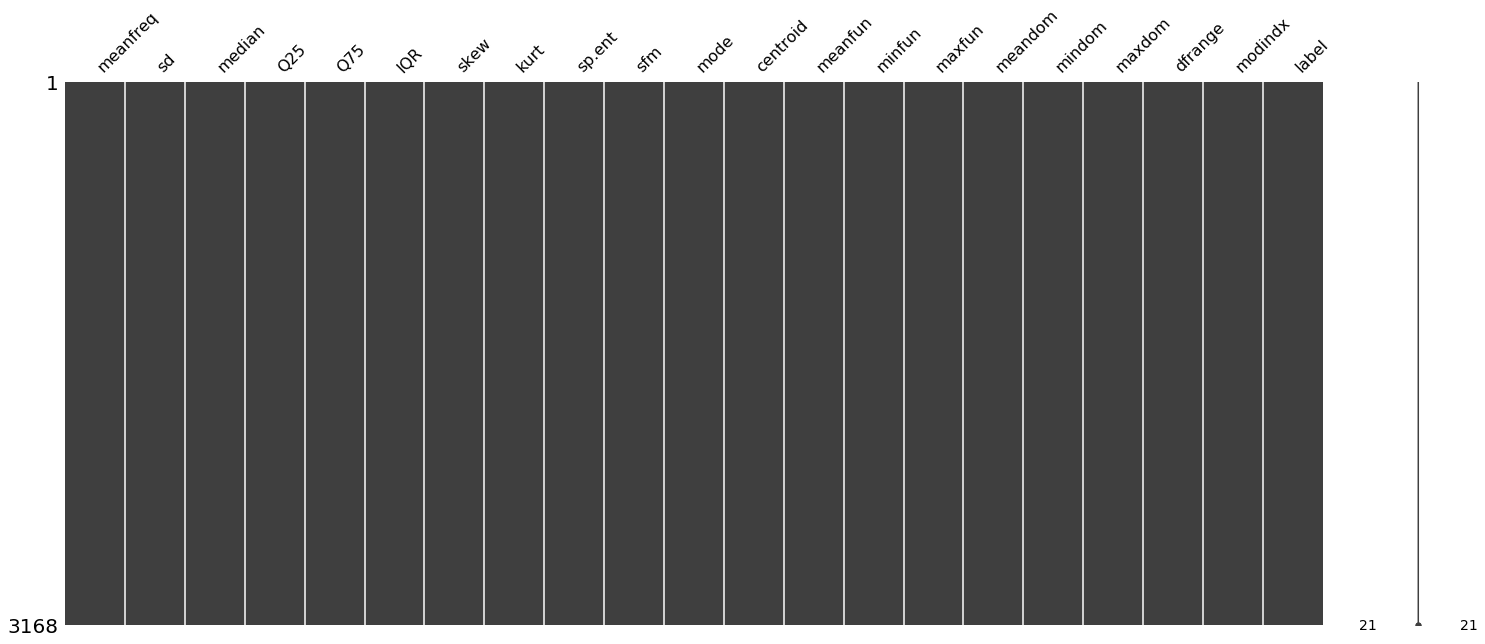

In [9]:
#missing values visually
msno.matrix(voice_df)

## Observations:



1. Shape of the data: 3168 rows, 21 columns.


2. Out of which all are numerical but the label column.


3. No duplicates present.


4. No missing values.


### Insights

In [10]:
voice_report = sv.analyze(voice_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [11]:
voice_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


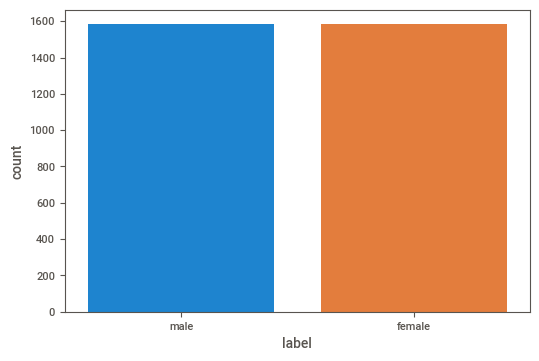

In [12]:
sns.countplot(data=voice_df,x='label')

It looks like data is balanced.

In [13]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=voice_df,x=feature,ax=axes[0])
    sns.distplot(a=voice_df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    

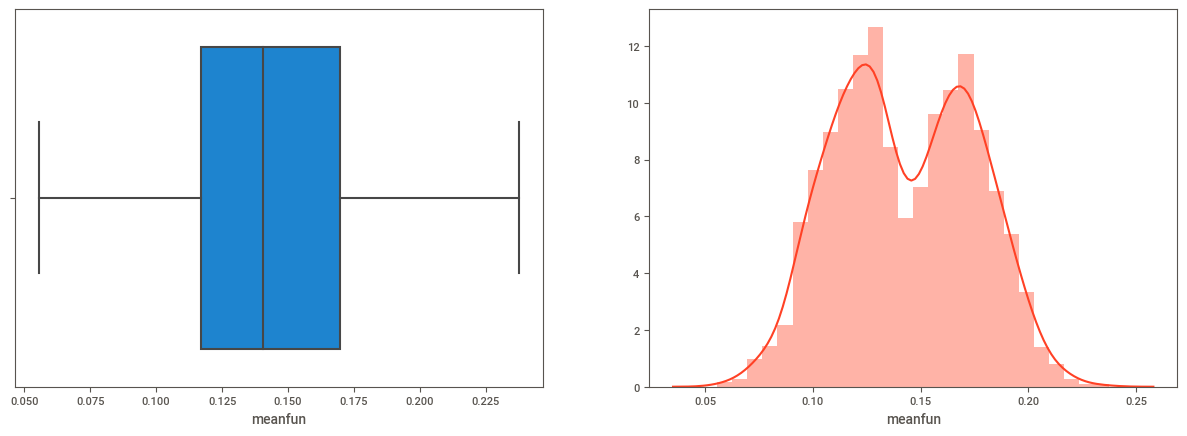

In [14]:
plot('meanfun')

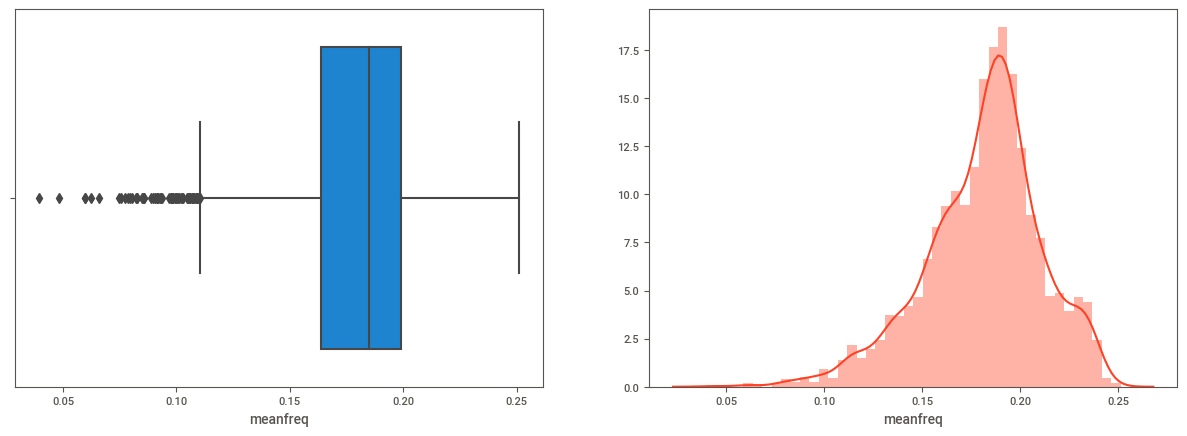

In [15]:
plot('meanfreq')

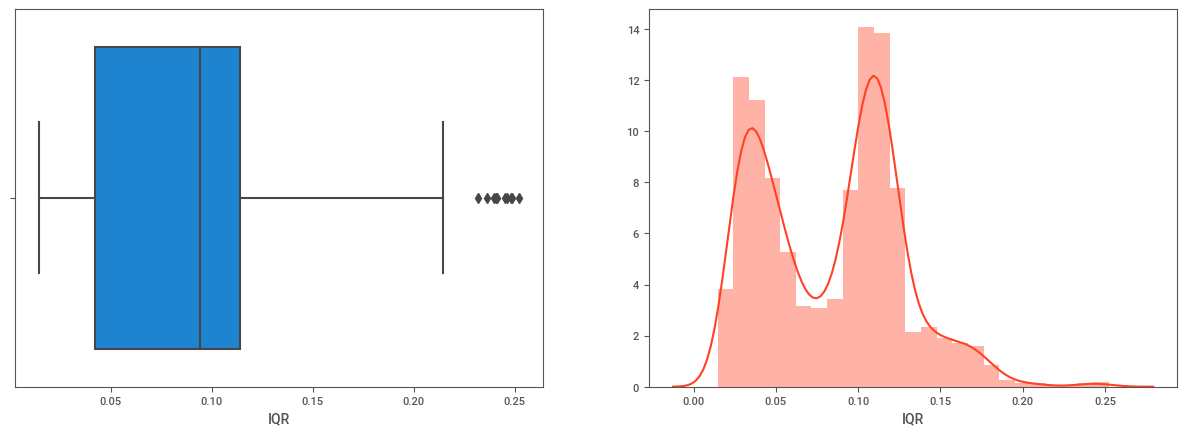

In [16]:
plot('IQR')

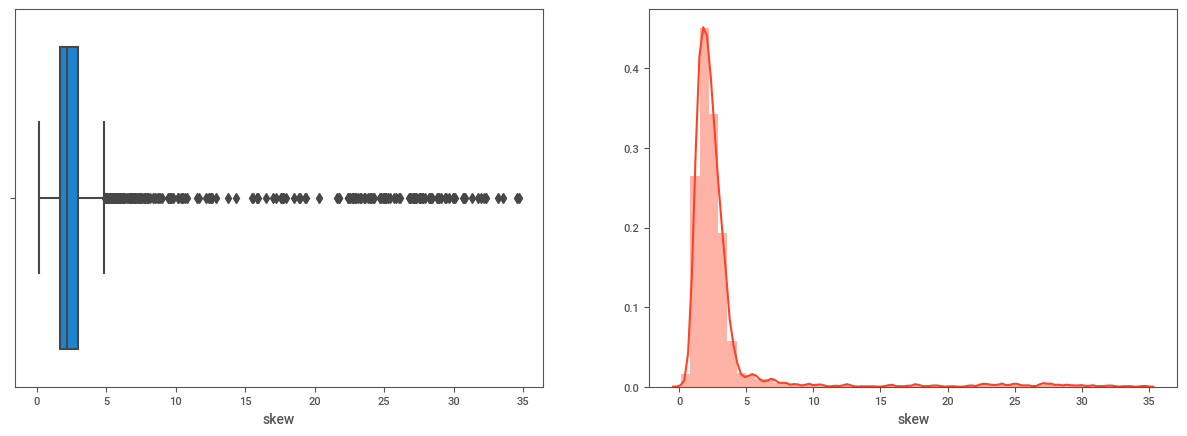

In [17]:
plot('skew')

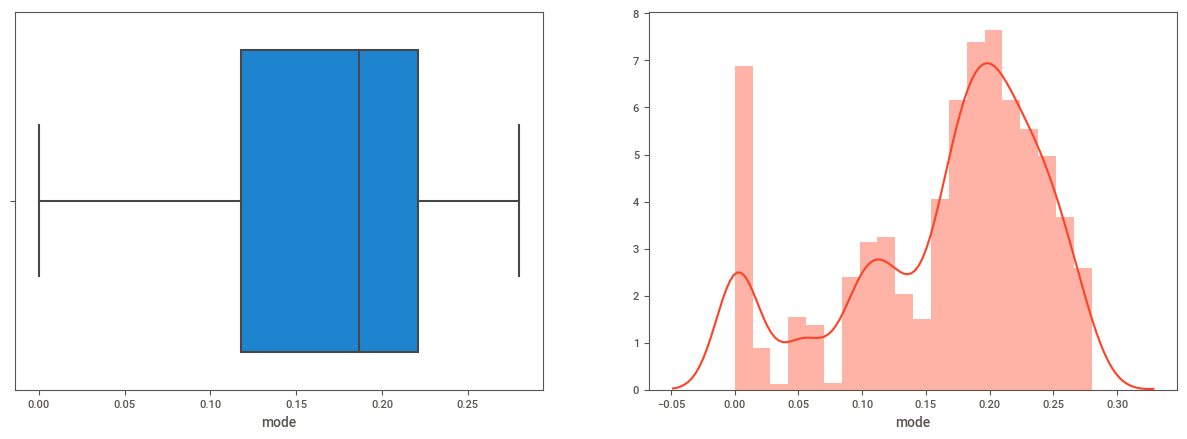

In [18]:
plot('mode')

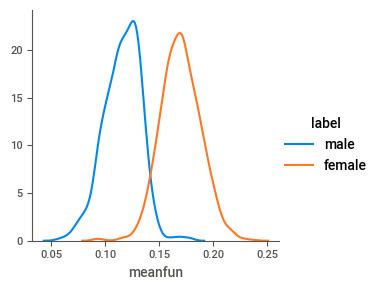

In [19]:
g = sns.FacetGrid(voice_df, hue="label").map(sns.kdeplot, "meanfun").add_legend()
plt.show()

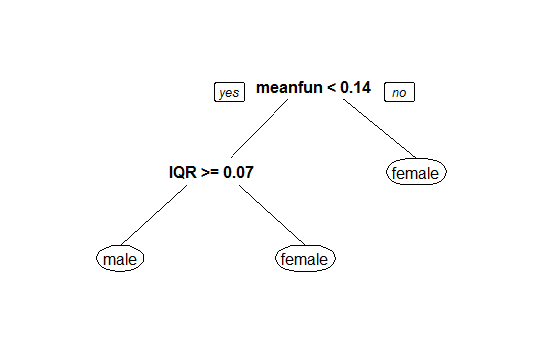

As the diagram represents, meanfun being lesser than 0.14 is male, greater is female. 

The plot says the same too. That there are more male below 0.14 and more female above 0.14 of average of fundamental frequency measured across acoustic signal.

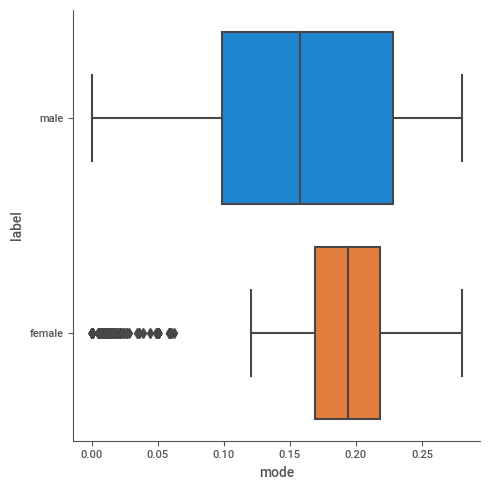

In [20]:
sns.catplot(x="mode", y="label", kind="box", data=voice_df)

  #### A detailed flowchart

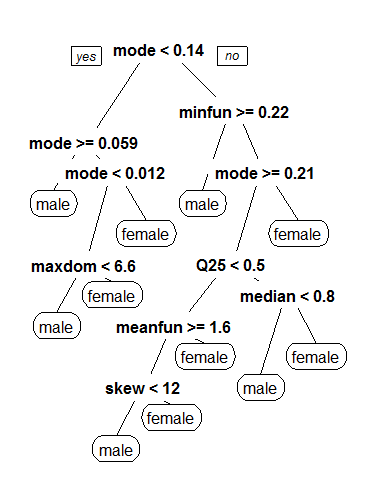


                                            

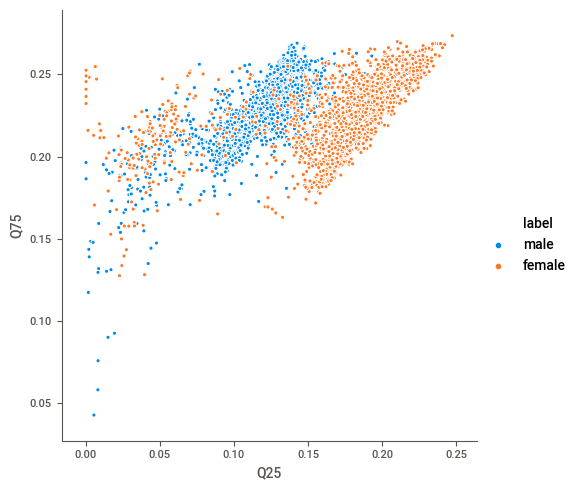

In [21]:
sns.relplot(data=voice_df,x="Q25", y='Q75',hue="label")

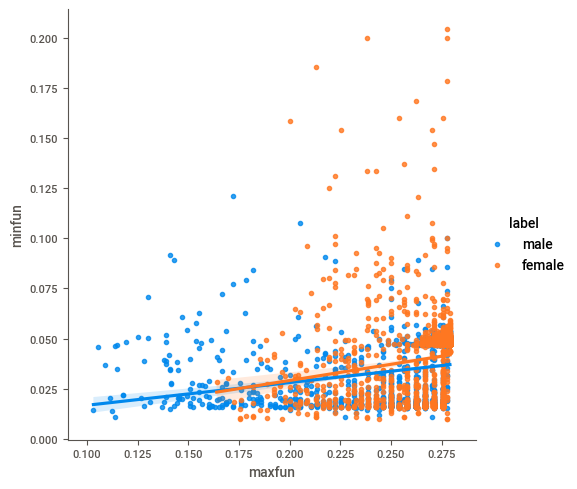

In [22]:
sns.lmplot(data=voice_df, x="maxfun", y="minfun", hue="label")

#### Outliers Analysis

In [23]:
Q1 = voice_df["IQR"].quantile(0.25)
Q3 = voice_df["IQR"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [24]:
print("lower", lower)

lower -0.06486329374490879


In [25]:
print("upper", upper)

upper 0.22159811474133245


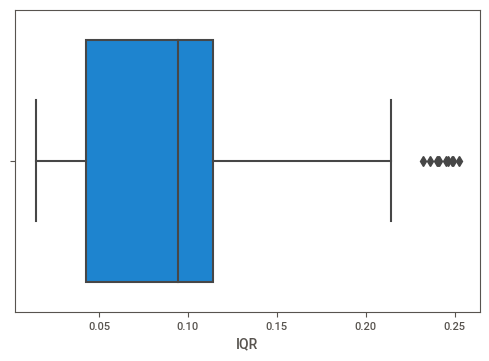

In [26]:
sns.boxplot(x=voice_df["IQR"])

In [27]:
voice_df[(voice_df["IQR"] > upper )].shape

(10, 21)

By taking IQR column, since there are less number of outliers that I see for the same. I am deciding to not to do anything with it.

### Converting 'label' column to numerical values:

Male being 1 and female being 0

In [28]:
y=voice_df.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
X = voice_df.drop('label',axis=1)
y = voice_df['label']

#### Standardization

In [30]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Splitting data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

### Building SVM

In [33]:
svm = SVC()

In [34]:
svm.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
yhat_train = svm.predict(X_train)
yhat_validation = svm.predict(X_validation)

In [36]:
print(accuracy_score(yhat_train, y_train), accuracy_score(yhat_validation, y_validation))

0.9842105263157894 0.9842271293375394


In [37]:
yhat_test = svm.predict(X_test)
accuracy_score(yhat_test, y_test)

0.9873817034700315

#### Performing SVM , kernel as rbf


In [38]:
svm_r1 = SVC(kernel='rbf')

In [39]:
svm_r1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
yhat_train_r1 = svm_r1.predict(X_train)
yhat_validation_r1 = svm_r1.predict(X_validation)

In [41]:
print(accuracy_score(yhat_train_r1, y_train), accuracy_score(yhat_validation_r1, y_validation))

0.9842105263157894 0.9842271293375394


In [42]:
yhat_test = svm_r1.predict(X_test)
accuracy_score(yhat_test, y_test)

0.9873817034700315

#### Building SVM by taking hyperparameter C=100, gamma=0.0001 and kernel as rbf


In [43]:
svm_r2 = SVC(kernel='rbf', gamma=0.0001, C=100)

In [44]:
svm_r2.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
yhat_train_r2 = svm_r2.predict(X_train)
yhat_validation_r2 = svm_r2.predict(X_validation)

In [46]:
print(accuracy_score(yhat_train_r2, y_train), accuracy_score(yhat_validation_r2, y_validation))

0.9726315789473684 0.9779179810725552


In [47]:
yhat_test = svm_r2.predict(X_test)
accuracy_score(yhat_test, y_test)

0.9779179810725552

#### Now performing SVM by taking hyperparameter degree=3 and kernel as poly

In [48]:
svm_p3 = SVC(kernel='poly', degree=3)

In [49]:
svm_p3.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
yhat_train_p1 = svm_p3.predict(X_train)
yhat_validation_p1 = svm_p3.predict(X_validation)

In [51]:
print(accuracy_score(yhat_train_p1, y_train), accuracy_score(yhat_validation_p1, y_validation))

0.9689473684210527 0.9589905362776026


In [52]:
yhat_test = svm_p3.predict(X_test)
accuracy_score(yhat_test, y_test)

0.9589905362776026

#### Now performing SVM by taking hyperparameter degree=2 and kernel as poly

In [53]:
svm_p2 = SVC(kernel='poly', degree=2)

In [54]:
svm_p2.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
yhat_train_p2 = svm_p2.predict(X_train)
yhat_validation_p2 = svm_p2.predict(X_validation)

In [56]:
print(accuracy_score(yhat_train_p2, y_train), accuracy_score(yhat_validation_p2, y_validation))

0.9042105263157895 0.9116719242902208


In [57]:
yhat_test = svm_p2.predict(X_test)
accuracy_score(yhat_test, y_test)

0.9085173501577287

### Conclusion:



The following are the results:


1. SVM - 98%


2. SVM (rbf) - 98%


3. SVM (rbf, C=100) - 97%


4. SVM (poly, degree=3) - 95%


5. SVM(poly, degree=2) - 90%



It can clearly be seen that SVM rbf with C=100, gamma=0.0001 has the best accuracy with 97% and is not overfitting or underfitting.


While choosing an RBF kernel, both c and gamma parameter need to optimized simultaneously. If gamma is large, the effect of c becomes negligible. If gamma is small, c affects the model just like how it affects a linear model. Typical values for c and gamma are as follows. However, specific optimal values may exist depending on the application:

0.0001 < gamma < 10

0.1 < c < 100


Reference:https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167












